In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libs

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-sizing images
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/colab/plast/train'
valid_path = '/content/drive/MyDrive/colab/plast/valid'


In [ ]:
# adding preprocessing layer
# using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/colab/plast/train*')

In [ ]:
# not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
from keras import optimizers
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/colab/plast/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/colab/plast/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# model fit is being run
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 8217s 14s/step - loss: 10.3727 - acc: 0.8923 - val_loss: 3.8409 - val_acc: 0.9456
Epoch 2/10
574/574 [==============================] - 230s 400ms/step - loss: 4.1026 - acc: 0.9476 - val_loss: 2.8166 - val_acc: 0.9612
Epoch 3/10
574/574 [==============================] - 228s 397ms/step - loss: 3.6617 - acc: 0.9565 - val_loss: 4.7797 - val_acc: 0.9522
Epoch 4/10
574/574 [==============================] - 228s 398ms/step - loss: 3.1493 - acc: 0.9614 - val_loss: 2.5853 - val_acc: 0.9685
Epoch 5/10
574/574 [==============================] - 227s 396ms/step - loss: 2.8052 - acc: 0.9672 - val_loss: 3.6523 - val_acc: 0.9615
Epoch 6/10
574/574 [==============================] - 228s 397ms/step - loss: 2.6064 - acc: 0.9691 - val_loss: 3.3415 - val_acc: 0.9650
Epoch 7/10
574/574 [==============================] - 228s 397ms/step - loss: 2.3282 - acc: 0.9725 - val_loss: 2.0595 - val_acc: 0.9756
Epoch 8/10
574/574 [============================

In [ ]:
import matplotlib.pyplot as plt

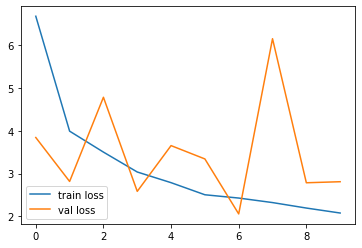

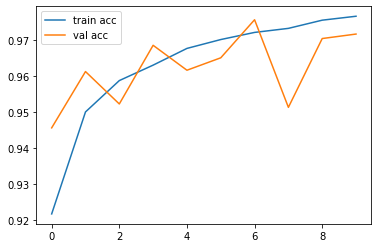

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('plasti.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[0.0000000e+00, 3.5092770e-21, 1.3265072e-33, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.7021868e-07, 1.4232304e-35, ..., 0.0000000e+00,
        0.0000000e+00, 6.6559060e-36],
       ...,
       [2.2802796e-24, 2.4126067e-28, 7.6809959e-16, ..., 1.4028595e-22,
        2.7866697e-11, 0.0000000e+00],
       [6.5687340e-36, 1.0000000e+00, 4.5745370e-27, ..., 5.7486554e-38,
        0.0000000e+00, 0.0000000e+00],
       [8.2374823e-25, 1.0000000e+00, 1.8290792e-16, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([8, 7, 6, ..., 3, 1, 1])

In [ ]:
img_data

NameError: ignored

In [ ]:
x=image.img_to_array(img)
x

NameError: ignored

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

TypeError: ignored

In [ ]:
img=image.load_img('/content/1fdbbbb4-fb2b-415b-a316-16688f21c4da___GCREC_Bact.Sp 3338.JPG',target_size=(224,224))



FileNotFoundError: ignored

In [ ]:
x.shape

TensorShape([None, 51200])

In [ ]:
x=x/255

In [ ]:
model.predict(img_data)

NameError: ignored

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

NameError: ignored

In [ ]:
training_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
a==0

NameError: ignored